## Imports

In [ ]:
import numpy as np
import math
from fractions import Fraction

from biotuner_utils import *
from biotuner import *

## Constants

In [ ]:
#CONSTANT

pyt_comma = 0.0136432
peaks = [2.4, 6.5, 11.4, 18.8, 29, 33.6]
round_peaks = [int(i) for i in peaks]

#planet ratios
Schumann_earth = [7.83, 14.3, 20.8, 27.3, 33.8]
Mercury = 141.27

## Functions

### Utilities

In [ ]:
a, b, c = compareLists([4, 4.8, 5.8], [5.8, 4, 8, 10], 0.1)
a

### Peak ratios and Harmonics

In [ ]:
peak_ratios, peak_ratios_bound = compute_peak_ratios(peaks)
peak_ratios_bound

In [ ]:


###TO DO###
#This function computes harmonics of a list of peaks and compares the lists of harmonics pairwise to find consonant ratios
#between different harmonic series
def harmonic_consonance_fit(peaks, n_harm = 10, bounds = 1, function = 'mult'):
    from itertools import combinations
    peak_bands = []
    for i in range(len(peaks)):
        peak_bands.append(i)
    if function == 'mult':
        multi_harmonics = EEG_harmonics_mult(peaks, n_harm)
    elif function == 'div':
        multi_harmonics, x, y, z = EEG_harmonics_div(peaks, n_harm)
    #print(multi_harmonics)
    list_peaks = list(combinations(peak_bands,2))
    print(list_peaks)
    harm_temp = []
    for i in range(len(list_peaks)):
        harms, b, c = compareLists(multi_harmonics[list_peaks[i][0]], multi_harmonics[list_peaks[i][1]], bounds)  
        harm_temp.append(harms)
    harm_fit = np.array(harm_temp).squeeze()

    if len(peak_bands) > 2:
        harm_fit = list(itertools.chain.from_iterable(harm_fit))

    return harm_fit

In [ ]:
peaks = [1.3,  4.8,  8.9, 15.2, 23.4, 34.2, 49.4]
test = harmonic_fit(peaks = peaks, n_harm = 15, bounds = 0.1)
test

In [ ]:
h, i = compute_peak_ratios(peaks, 1, 2)
i

In [ ]:
peaks = [2.3, 4.7, 9.9, 13, 19.2, 33, 45.3]
z, charm_fit = compute_peak_ratios(harmonic_fit(33, 0.1, 'mult', peaks))
charm_fit

In [ ]:
mh, mh_bound, mh_sub, mh_sub_bound = EEG_harmonics_div(peaks, 10, n_oct_up = 0)
mh
#div_harmonics = compareLists(mh[5], mh[4], 0.01)
#div_harmonics

In [ ]:
#Compute peaks interval of consonant harmonics
#conson, cons_values = compute_consonance ((harmonic_fit(50, 0.1, 'mult')), 0.2)
#cons_values

#Finds the best octave subdivisions for the harmonic spectrum of the peaks list
peaks = [42.5, 5.5, 8.3, 1.5, 19.5, 10, 32.4]
max_sub = 200
octave_limit = 0.01

peaks_harmonics = harmonic_fit(50, 0.05, 'mult')

oct_div_final, ratios = multi_oct_subdiv(peaks_harmonics, max_sub, octave_limit)
oct_div_final, ratios


### n-TET 

In [ ]:
4.4*(3/2)

In [ ]:
peaks = [2.4, 5, 9, 13.8, 25, 36.6, 49]
max_sub = 120
octave_limit = 0.05

oct_div_final, ratios = multi_oct_subdiv(peaks, max_sub, octave_limit)
oct_div_final, ratios

### Consonance

In [ ]:


def simple_consonance(peaks):
    cons = Fraction(peaks[0]/peaks[1]).limit_denominator(1000) 
    cons = (cons.numerator + cons.denominator)/(cons.numerator * cons.denominator)
    return cons

def simple_consonance_one_octave(peaks):
    
    cons = Fraction(peaks[0]/peaks[1]).limit_denominator(1000) 
    print(cons)
    cons = (cons.numerator + cons.denominator)/(cons.numerator * cons.denominator)
    return cons

def cons_spectrum(peak):
    bins = list(range(10, 600, 1))
    bins = [x / 10 for x in bins]

    spectrum_cons = []
    for i in range(len(bins)):
        c = [peak, np.float(bins[i])]
        a = simple_consonance(c)

        spectrum_cons.append(a)
    full_cons = np.array(spectrum_cons)
    return full_cons, bins

def full_spectrum(peaks):
    import pandas as pd
    import seaborn as sbn
    full_cons = []
    for i in peaks:

        p_spectrum, bins = cons_spectrum(i)
        full_cons.append(p_spectrum)
    #full_cons = np.array(full_cons)

    
    full_spect= pd.DataFrame(np.array(full_cons))
    full_spect.loc[len(full_spect.index)] = bins
    return full_spect, bins


In [ ]:
peaks = [11, 23, 31]
spect, bins = full_spectrum(peaks)
spect

In [ ]:
peaks = [6, 10.4]
c_spect, bins = full_spectrum(peaks)

cons_limit = 0.3
freq_temp = []
c = np.array(c_spect)
for freq in range(len(c[0])):
    if c[0][freq]> cons_limit and c[1][freq] > cons_limit and c[2][freq]>2:
        freq_temp.append(c[2][freq])
      
c_spect = c_spect.T
c_spect = c_spect.set_index(2)
c_spect = c_spect.T

freq_temp 

In [ ]:
freq_temp

In [ ]:
c_spect

In [ ]:
#Find an indicator of discrepancy between simple consonance score, and number of matching consonance in the harmonics
#that would reflect harmonic depth of a ratio, a complexity that might be grasped by autocorrelation or recursive
#approaches
  
simple_consonance([1, 1.618])

In [ ]:
#sbn.distplot(c_spect[4], bins = 10)

In [ ]:
fit = harmonic_fit(peaks, n_harm = 20, bounds = 1, function = 'mult')
fit



In [ ]:
peaks = [12, 21.6]
c_spect, bins = full_spectrum(peaks)

cons_limit = 0.2
freq_temp = []
c = np.array(c_spect)
for freq in range(len(c[0])):
    if c[0][freq]> cons_limit and c[1][freq] > cons_limit and c[2][freq]>np.min(peaks):
        freq_temp.append(c[2][freq])
      
c_spect = c_spect.T
c_spect = c_spect.set_index(2)
c_spect = c_spect.T

freq_temp

In [ ]:
#peaks = [8.8, 12] ## Gives reverse harmonics
peaks = [9, 12]
c_spect, bins = full_spectrum(peaks)

cons_limit = 0.3
freq_temp = []
c = np.array(c_spect)
for freq in range(len(c[0])):
    if c[0][freq]> cons_limit and c[1][freq] > cons_limit and c[2][freq]>2:
        freq_temp.append(c[2][freq])

c_spect = c_spect.T
c_spect = c_spect.set_index(2)
c_spect = c_spect.T

freq_temp 


####PLOT FIGURE############
plt.figure(figsize=(50,20))
#log_norm = LogNorm(vmin=full_cons.min().min(), vmax=full_cons.max().max())
#sbn.heatmap(c_spect, norm=log_norm, cmap = 'Purples')
sbn.set(font_scale=4)


ax = sbn.heatmap(c_spect, cmap = 'mako'
            , xticklabels = 10, vmin = 0, vmax = 1)
                #,norm=LogNorm())

for p in peaks:
    ax.axvline((p*10)-10, color='Red', linewidth=7, ls = '-.', label=str(p))
for f in freq_temp:
    ax.axvline((f*10)-10, color='White', linewidth=7, ls = '--')#, label=str(f))

plt.legend(loc = 'upper right')
props = dict(boxstyle='round', facecolor='White', alpha=0.8)
ax.text(0.79, 0.73, 'n of consonant harmonics: '+ str(len(freq_temp)), transform=ax.transAxes, fontsize=35,
        verticalalignment='top', bbox=props)

ax.text(0.84, 0.80, 'consonance = : '+ str(np.round(simple_consonance(peaks), 2)), transform=ax.transAxes, fontsize=35,
        verticalalignment='top', bbox=props)
plt.show()
#tick_locator = ticker.MaxNLocator(50)
#ax.xaxis.set_major_locator(tick_locator)

figure = ax.get_figure()    
figure.savefig('spectral_consonance-{}-{}.png'.format(peaks[0], peaks[1]), dpi=300)

In [ ]:
ratios = []
for p in peaks:
    ratios_temp = []
    for f in freq_temp: 
        rat = Fraction(f/p).limit_denominator(1000)
        num = rat.numerator
        denom = rat.denominator
        frac_list = str(num)+'/'+str(denom)
        ratios_temp.append(frac_list)
    ratios.append(ratios_temp)
    
ratios_tot = np.array(ratios)
ratios_tot

In [ ]:
ratios_tot

In [ ]:
rat = Fraction(88/120).limit_denominator(1000)
num = rat.numerator
denom = rat.denominator
frac_list = [num, denom]
frac_list

In [ ]:
freq_temp

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sbn
from matplotlib.colors import LogNorm
###COMPUTE THE SPECTRUM OF CONSONANCE FOR TWO PEAKS#######

for i in range(1, 60):
    peaks = [14, i]
    c_spect, bins = full_spectrum(peaks)

    cons_limit = 0.3
    freq_temp = []
    c = np.array(c_spect)
    for freq in range(len(c[0])):
        if c[0][freq]> cons_limit and c[1][freq] > cons_limit and c[2][freq]>2:
            freq_temp.append(c[2][freq])

    c_spect = c_spect.T
    c_spect = c_spect.set_index(2)
    c_spect = c_spect.T

    freq_temp 


    ####PLOT FIGURE############
    plt.figure(figsize=(50,20))
    #log_norm = LogNorm(vmin=full_cons.min().min(), vmax=full_cons.max().max())
    #sbn.heatmap(c_spect, norm=log_norm, cmap = 'Purples')
    sbn.set(font_scale=4)


    ax = sbn.heatmap(c_spect, cmap = 'mako'
                , xticklabels = 10, vmin = 0, vmax = 1)
                    #,norm=LogNorm())

    for p in peaks:
        ax.axvline((p*10)-10, color='Red', linewidth=7, ls = '-.', label=str(p))
    for f in freq_temp:
        ax.axvline((f*10)-10, color='White', linewidth=7, ls = '--')#, label=str(f))

    plt.legend(loc = 'upper right')
    props = dict(boxstyle='round', facecolor='White', alpha=0.8)
    ax.text(0.79, 0.73, 'n of consonant harmonics: '+ str(len(freq_temp)), transform=ax.transAxes, fontsize=35,
            verticalalignment='top', bbox=props)

    ax.text(0.84, 0.80, 'consonance = : '+ str(np.round(simple_consonance(peaks), 2)), transform=ax.transAxes, fontsize=35,
            verticalalignment='top', bbox=props)
    plt.show()
    #tick_locator = ticker.MaxNLocator(50)
    #ax.xaxis.set_major_locator(tick_locator)

    figure = ax.get_figure()    
    figure.savefig('spectral_consonance-{}-{}.png'.format(peaks[0], peaks[1]), dpi=300)

In [ ]:
c_spect

In [ ]:
###COMPUTE THE SPECTRUM OF CONSONANCE FOR 3 PEAKS#######

##TO ADD :
## - correlation between consonance value and number of consonant harmonics
## - deriving scale from ratio positions. 

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sbn
from matplotlib.colors import LogNorm


for i in range(1, 30):
    peaks = [4, 9, i]
    c_spect, bins = full_spectrum(peaks)

    cons_limit = 0.25
    freq_temp = []
    c = np.array(c_spect)
    for freq in range(len(c[0])):
        if c[0][freq]> cons_limit and c[1][freq] > cons_limit and c[2][freq] > cons_limit and c[3][freq]>np.min(peaks):
            freq_temp.append(c[3][freq])

    c_spect = c_spect.T
    c_spect = c_spect.set_index(3)
    c_spect = c_spect.T

    freq_temp 


    ####PLOT FIGURE############
    plt.figure(figsize=(50,20))
    #log_norm = LogNorm(vmin=full_cons.min().min(), vmax=full_cons.max().max())
    #sbn.heatmap(c_spect, norm=log_norm, cmap = 'Purples')
    sbn.set(font_scale=4)


    ax = sbn.heatmap(c_spect.abs(), cmap = 'mako'
                , xticklabels = 10, vmin = 0, vmax = 1)
                    #,norm=LogNorm())

    for p in peaks:
        ax.axvline((p*10)-10, color='Red', linewidth=7, label=str(p))
    for f in freq_temp:
        ax.axvline((f*10)-10, color='White', linewidth=7, ls = '--')#, label=str(f))

    plt.legend(loc = 'upper right')
    props = dict(boxstyle='round', facecolor='White', alpha=0.8)
    ax.text(0.79, 0.70, 'n of consonant harmonics: '+ str(len(freq_temp)), transform=ax.transAxes, fontsize=35,
            verticalalignment='top', bbox=props)

    cons_temp = np.round((simple_consonance([peaks[0], peaks[1]])+simple_consonance([peaks[1], peaks[2]])+
                          simple_consonance([peaks[0], peaks[2]]))/3, 2)
    ax.text(0.84, 0.77, 'consonance = : '+ str(cons_temp), transform=ax.transAxes, fontsize=35,
            verticalalignment='top', bbox=props)
    plt.show()
    #tick_locator = ticker.MaxNLocator(50)
    #ax.xaxis.set_major_locator(tick_locator)

    figure = ax.get_figure()    
    figure.savefig('spectral_consonance-{}-{}-{}.png'.format(peaks[0], peaks[1], peaks[2]), dpi=300)

In [ ]:
simple_consonance([3,2])

In [ ]:
freq_temp

In [ ]:
peaks = [1.1, 2.4, 6.7, 8.9, 13.5]
for p1 in peaks:
    nextelem = peaks[peaks.index(p1)+1]
    print(nextelem)
    

In [ ]:
###pyACA to compute spectral features

import pyACA

[v,t] = pyACA.computeFeatureCl(cPath, "SpectralCentroid")

In [ ]:

def simple_consonance (peaks)

def fullband_consonance (peaks, limit):
    from fractions import Fraction
    consonance_ = []
    peaks2keep = []
    peaks_consonance = []
    for p1 in peaks:
        
        peaks2keep_temp = []

        if p1 > p1:
            while p1x > p2x:
                p1x = p1x/2
        if p1x < p2x:
            while p2x > p1x:
                p2x = p2x/2

        cons_temp = Fraction(p2x/p1x).limit_denominator(1000)
        #print(cons_temp)
        cons_temp = (cons_temp.numerator + cons_temp.denominator)/(cons_temp.numerator * cons_temp.denominator)
            peaks2keep_temp.extend([p2, p1])
        consonance_.append(cons_temp)
        peaks2keep.append(peaks2keep_temp)
    peaks_consonance = np.array(peaks2keep)
    peaks_consonance = [x for x in peaks_consonance if x]
    consonance = np.array(consonance_)
    consonance = [i for i in consonance if i]

        #consonance = list(set(consonance))
    return consonance, peaks_consonance

In [ ]:

a, b = compute_consonance(peaks + Schumann_earth, 0.1)
c, d = comp_consonant_integers_ratios (b)
print(sorted(d))
#print(d)



### Tunings

In [ ]:
# Function that computes Pythogorian Tunings from integer ratios 
# List of equations of the Pythagorean Tuning
# variable 'a' has to be the highest value in the ratio

#INPUTS (a: numerator of the source ratio / b: denominator of the source ratio
#        n: multiplifier of all notes / octa: octave value / lim_denom: highest value possible
#        for the denominator of the ratios)
#OUTPUTS

def compute_pythagore(a = 3, b = 2, n = 1, octa = 2, lim_denom = 1000):
    import operator
    pyth0 = n * (1/1)
    pyth1 = n * ((b/a)**5)*(octa**3)
    pyth1 = rebound(pyth1, 1, octa)
    pyth2 = n * ((a/b)**2)*(1/octa)
    pyth2 = rebound(pyth2, 1, octa)
    pyth3 = n * ((b/a)**3)*(octa**2)
    pyth3 = rebound(pyth3, 1, octa)
    pyth4 = n * ((a/b)**4)*((1/octa)**2)
    pyth4 = rebound(pyth4, 1, octa)
    pyth5 = n * (b/a)*octa
    pyth5 = rebound(pyth5, 1, octa)
    pyth6 = n * ((b/a)**6)*(octa**4)
    pyth6 = rebound(pyth6, 1, octa)
    pyth6_2 = n * ((a/b)**6)*((1/octa)**3)
    pyth6_2 = rebound(pyth6_2, 1, octa)
    pyth7 = n * (a/b)
    pyth7 = rebound(pyth7, 1, octa)
    pyth8 = n * ((b/a)**4)*(octa**3)
    pyth8 = rebound(pyth8, 1, octa)
    pyth9 = n * ((a/b)**3)*(1/octa)
    pyth9 = rebound(pyth9, 1, octa)
    pyth10 = n * ((b/a)**2)*(octa**2)
    pyth10 = rebound(pyth10, 1, octa)
    pyth11 = n * ((a/b)**5)*((1/octa)**2)
    pyth11 = rebound(pyth11, 1, octa)
    pyth12 = rebound((n * octa), 1, octa)
    
    pyth_dict = {'unison':pyth0,
             'minor second':pyth1,
             'major second':pyth2,
             'minor third':pyth3,
             'major third':pyth4,
             'perfect fourth':pyth5,
             'diminished fifth':pyth6,
             'augmented fourth':pyth6_2,
             'perfect fifth':pyth7,
             'minor sixth':pyth8,
             'major sixth':pyth9,
             'minor seventh':pyth10,
             'major seventh':pyth11,
             'octave':pyth12}
    pyth_dict_list = sorted(pyth_dict.items(), key=operator.itemgetter(1))
    pyth_dict = dict(pyth_dict)
    pyth_temp = []
    pyth_temp_float = []
    for i in range(len(pyth_dict_list)):
        frac = []
        #print(harm_tuning[i])
        pyth_ratios = Fraction(pyth_dict_list[i][1]).limit_denominator(lim_denom)
        pyth_float = pyth_dict_list[i][1]
        num = pyth_ratios.numerator
        denom = pyth_ratios.denominator
        frac.extend([num, denom])
        #print(harm_ratios_temp)
        pyth_temp.append(frac)
        pyth_temp_float.append(pyth_float)
       
    pyth_dict_list_ratios = (np.array(pyth_temp)).squeeze()
    pyth_dict_list_float = np.around((np.array(pyth_temp_float)),3) 
    
    return pyth_dict, pyth_dict_list, pyth_dict_list_ratios, pyth_dict_list_float

#This Function build a tuning based on the multiplication of a ratio by itself.
def harmonic_tuning(n_harmonics = 10, octave = 2, rounding = 10, pos = 1):
    harm_tuning_temp = []
    i = 1
    harm_ratios = []
    harm_ratios_temp = []
    while i <= n_harmonics:
        harm_temp = pos*i
        harm_tuning_temp.append(harm_temp)
        i+=1
    
    for h in harm_tuning_temp:
                while h > pos*octave:
                    h = h/octave
                while h > octave:
                    h = h/pos
                h = round(h, rounding)

                #if h == octave:
                #    h = None
                harm_ratios_temp.append(h)
    harm_tuning = np.array(harm_ratios_temp)
    harm_tuning = [i for i in harm_tuning if i]
    harm_tuning = list(set(harm_tuning))
    for i in range(len(harm_tuning)):
        frac = []
        #print(harm_tuning[i])
        harm_ratios_temp = Fraction(harm_tuning[i]).limit_denominator()
        num = harm_ratios_temp.numerator
        denom = harm_ratios_temp.denominator
        frac.extend([num, denom])
        #print(harm_ratios_temp)
        harm_ratios.append(frac)
    
    harm_tuning_frac = (np.array(harm_ratios)).squeeze().tolist()

    return harm_tuning, harm_tuning_frac

#This function subdivides the octave in equal parts
def Ntet_tuning(subdiv, octave):
    ratios_temp = []
    for i in range(subdiv+1):
        ratios_temp.append(octave**(i/subdiv))
    ratios = np.array(ratios_temp)
    return ratios

In [ ]:
harm_tuning, h = harmonic_tuning(n_harmonics = 50, octave = 2, rounding = 10, pos = 3)
harm_tuning

In [ ]:
octdiv = compare_octave_division(Octdiv = 53, Octdiv2 = 12, bounds = 0.01, octave = 2)
octdiv

In [ ]:
x = compareLists(multi_harmonics[list_peaks[0][1]], multi_harmonics[list_peaks[0][0]], 0.1)
x
#multi_harmonics[list_peaks[0][1]]

## Bidouille

In [ ]:
#compute_consonance takes a list of peaks as input(1) and a threshold(2)
#above which the peaks are kept
#output(1) returns the consonance values
#output(2) return the peaks corresponding to the consonance values
consonant_values, consonant_peaks = compute_consonance(Schumann_earth+peaks, 0.01)
print('CONSONANT PEAKS')
print(consonant_peaks)
#This function takes a list of consonant peaks and returns the peak ratios
#with integer values
cons_integers = comp_consonant_integers_ratios(consonant_peaks)
print('CONSONANT INTEGER RATIOS')
print(cons_integers)

In [ ]:

#Oct_subdiv
#Argument 1 : a ratio in the form of a float or a fraction
#Argument 2 : bounds between which the octave should fall
#Argument 3 : value of the octave
#Argument 4 : number of octave subdivisions
Octdiv, Octvalue, ratios_tet = oct_subdiv(1.625, 0.05, 2, 5)
print('OCTAVE SUBDIVISIONS')
print(Octdiv, Octvalue)
print('RATIOS-TET')
print(ratios_tet)
pairwise_oct_div = compare_octave_division(Octdiv = 23, Octdiv2 = 33, bounds = 0.005, octave = 2)
print('COMPARE OCTAVE SUBDIVISIONS')
print(pairwise_oct_div)




peak_ratios, peak_ratios_rebound = compute_peak_ratios(peaks, 1)
print('PEAK RATIOS')
print(peak_ratios, peak_ratios_rebound)



#Calculates a specific number of partials from a list of peaks [n_peaks][n_harmonic]
multi_harmonics= EEG_harmonics_mult(peaks, 50, 0)
print('HARMONICS (x*n)')
print(multi_harmonics)
#Calculates a specific number of elements in the harmonics series
#from a list of peaks [n_peaks][n_harmonic]
harm_div, harm_div_bound, harm_div_sub, harm_div_sub_bound = EEG_harmonics_div(peaks, n_harmonics = 8)
print('HARMONICS (x/n)')
print(harm_div_bound)

#pyth_dict, pyth_dict_list = compute_pythagore(cons_integers[2][0], cons_integers[2][1], 1, 2)
a, b, c, d = compute_pythagore(4, 3, 1, 2, 1000)
a

In [ ]:
a, b, c, d = compute_pythagore(11, 4, 1, 3, 1000)
d

In [ ]:
compute_consonance(d, 0.01)

In [ ]:
#Create a function that compute pair-wise comparisons between each harmonic of one peak with all harmonics of other peaks
#and returns matching peaks and their harmonic position
bounds = 0.5
for p in range(len(multi_harmonics)):
    for h in range(len(multi_harmonics[0])):
        if p != 
        
        

In [ ]:
a, b, c, d= compute_pythagore(11, 3, 1, 3)
d

In [ ]:
peaks_pyth = compute_peak_ratios(d)
peaks_pyth

In [ ]:
h, i = harmonic_tuning(20, 2)
h


In [ ]:
a, b, ratio_mult = oct_subdiv(1.5, 0.02, 2, 1)
print(ratio_mult)


pyth_dict, pyth_dict_list = compute_pythagore(3, 2, 1, 2)
print(pyth_dict_list)

In [ ]:
## Calculate hertz to cents

c = 1200 × log2 (f2 / f1)

# Dissonance

In [ ]:
#Functions taken from : https://gist.github.com/endolith/118429

from __future__ import division
from fractions import Fraction
from math import log


def product(*iterable):
    p = 1
    for n in iterable:
        p *= n
    return p


def gcd(*numbers):
    """Return the greatest common divisor of the given integers
    
    The result will have the same sign as the last number given (so that 
    when the last number is divided by the result, the result comes out 
    positive).
    
    """
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    
    return reduce(gcd, numbers)


def lcm(*numbers):
    """Return the least common multiple of the given integers
    
    """
    def lcm(a,b):
        if a == b == 0:
            return 0
        return (a * b) // gcd(a, b)

    # LCM(a, b, c, d) = LCM(a, LCM(b, LCM(c, d)))
    return reduce(lcm, numbers)


def reduced_form(*numbers):
    """Return a tuple of numbers which is the reduced form of the input, 
    which is a list of integers
    
    """
    return tuple(int(a // gcd(*numbers)) for a in numbers)


def prime_factors(n):
    """Return a list of the prime factors of the integer n.
    
    Don't use this for big numbers; it's a dumb brute-force method.
    
    """
    factors = []
    lastresult = n
    
    while lastresult > 1:
        c = 2
        while lastresult % c > 0:
            c += 1
        factors.append(c)
        lastresult /= c
    
    return factors


def euler(*numbers):
    """Euler's "gradus suavitatis" (degree of sweetness) function
    
    Return the "degree of sweetness" of a musical interval or chord expressed 
    as a ratio of frequencies a:b:c, according to Euler's formula
    
    Greater values indicate more dissonance
        
    """
    factors = prime_factors(lcm(*reduced_form(*numbers)))
    return 1 + sum(p - 1 for p in factors)


def wiseman(a, b):
    """Return a value corresponding to the dissonance of a musical interval 
    of ratio a:b
    
    This is taken from Gus Wiseman's paper at 
    http://www.nafindix.com/math/sensory.pdf
    
    It apparently is derived from the total period of two tones, so a tone 
    of period 2 and a tone of period 3 when summed will give a total period 
    of 6 (which is LCM(2,3))
    
    Since a ratio of frequencies is just the inverse of a ratio of periods, 
    and inverting the terms has no effect on this formula, I *think* it's 
    valid to just plug in frequency ratios, too.
    
    Same as "harmonic value"?
    TODO: a/gcd(all) and b/gcd(all) is just the reduced form, right?  and if a,b are in reduced form, then lcm(a,b) =a*b, right?  So this is just a*b when a,b are in reduced form.  So this should be benedetti().  https://en.wikipedia.org/wiki/Giambattista_Benedetti#Music
    product(*reduced_form(a,b))
    
    http://xenharmonic.wikispaces.com/Benedetti+height
    
    """
    return lcm(a / gcd(a, b), b / gcd(a, b));


def tenney(a, b):
    """Return Tenney's harmonic distance of a musical interval of ratio a:b
    
    "Tenney's HD function, in one of its simplest forms, is perhaps the most 
    direct. It is HD(a/b) = log(ab)"
    
    Also called "Tenney height" with log2: http://xenharmonic.wikispaces.com/Tenney+Height
    Tenney's paper says "harmonic distance" and "log", but relates it to a lattice so maybe the log2 is implied?
    
    http://lumma.org/tuning/faq/#heights says
    Of these, the product of numerator and denominator, often
    written n*d, for a ratio n/d in lowest terms, has been found to
    best agree with informal rankings by listeners as well as
    published psychoacoustic data.  
    
    The n*d rule is also called Tenney height, after James Tenney^1,
    
    Tenney height generalizes to geomean(a*b*c...) for a chord
    a:b:c..., which gives sqrt(n*d) for dyads.
    
    """
    return log(product(*reduced_form(a,b)));

## Dissonance curve from Sethares

In [ ]:

from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelmin

import dissonant as D
from dissonant import harmonic_tone, dissonance, pitch_to_freq
#from dissonant import harmonic_tone, dissonance, pitch_to_freq
freqs, amps = harmonic_tone(pitch_to_freq([0, 2.5, 7, 12]), n_partials=100)
dis = dissonance(freqs, amps, model='sethares1993')
dis

In [ ]:
def freq_space(base_f=440, octaves=4, steps=1000):
    ratios = np.linspace(1, octaves, steps)
    freqs = base_f * ratios
    return freqs

def dissonance_curve(freq_space, n_partials=10, model='sethares1993'):
    dissonances = []
    for freq in freq_space:
        h_freqs, h_amps = D.harmonic_tone([freq_space[0], freq], n_partials=n_partials)
        print(h_amps)
        d = D.dissonance(h_freqs, h_amps, model=model)
        dissonances.append(d)
    dissonances = np.array(dissonances)
    return dissonances

def plot_dissonance_curve(freqs, dissonances):
    minima = argrelmin(dissonances)[0]

    plt.figure(figsize=(16, 3))
    plt.xlim(freqs[0], freqs[-1])
    plt.plot(freqs, dissonances)
    for m in minima:
        plt.axvline(freqs[m], c='r', ls=':')
    plt.xlabel('frequency')
    plt.ylabel('dissonance')

In [ ]:
d = harmonic_fitting.copy()
for num in range(len(d)):
    d[num] *= 30

In [ ]:
peaks = [2, 3.2, 8.1, 16.6, 32.3, 39]

In [ ]:
a, b = compute_peak_ratios(peaks)
harmomic_fitting = harmonic_fitting.sort() 
harmonic_fitting

In [ ]:

#freqs = d
freqs = freq_space(1000, 2, 100)
plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=250, model='sethares1993'))

In [ ]:
freqs

# PyTuning

In [ ]:
import pytuning as pt
import sympy as sp
from pytuning.scales import create_edo_scale
edo_12 = create_edo_scale(10)
edo_12


#x = pt.find_best_modes(harm_ratios[0], 7)
#x
#major_mask = (0,2,4,5,7,9,11,12)
#major_mode = mask_scale(edo_12_scale, major_mask)
#major_mode

In [ ]:
float(edo_12[7])

In [ ]:
x = pt.find_best_modes(charm_fit, 3)
x


In [ ]:
#This function is similar to the harmonic_tuning function built in BioTuning Package

from pytuning.scales import create_harmonic_scale
scale = create_harmonic_scale(1,20)
scale

h, i = harmonic_tuning(12, 2)
h



In [ ]:
#Computes ratios of the harmonic scale

harm_ratios = compute_peak_ratios(h)
harm_ratios[0]

In [ ]:
h = EEG_harmonics_mult(peaks, 12, 0)
h

In [ ]:
z = pt.scales.create_equal_interval_scale(1.625, scale_size=10)
z

In [ ]:
sorted(ratios_tet)

In [ ]:
intervals     = [22, 5, 9, 15]
multiplicities = [1,1,1,1]
scale         = pt.scales.create_euler_fokker_scale(intervals, multiplicities)
scale

In [ ]:
3/2**(1/9)

## PyAudio

In [7]:
import pyaudio
import struct
import math

FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100

p = pyaudio.PyAudio()


def data_for_freq(frequency: float, time: float = None):
    """get frames for a fixed frequency for a specified time or
    number of frames, if frame_count is specified, the specified
    time is ignored"""
    frame_count = int(RATE * time)

    remainder_frames = frame_count % RATE
    wavedata = []

    for i in range(frame_count):
        a = RATE / frequency  # number of frames per wave
        b = i / a
        # explanation for b
        # considering one wave, what part of the wave should this be
        # if we graph the sine wave in a
        # displacement vs i graph for the particle
        # where 0 is the beginning of the sine wave and
        # 1 the end of the sine wave
        # which part is "i" is denoted by b
        # for clarity you might use
        # though this is redundant since math.sin is a looping function
        # b = b - int(b)

        c = b * (2 * math.pi)
        # explanation for c
        # now we map b to between 0 and 2*math.PI
        # since 0 - 2*PI, 2*PI - 4*PI, ...
        # are the repeating domains of the sin wave (so the decimal values will
        # also be mapped accordingly,
        # and the integral values will be multiplied
        # by 2*PI and since sin(n*2*PI) is zero where n is an integer)
        d = math.sin(c) * 32767
        e = int(d)
        wavedata.append(e)

    for i in range(remainder_frames):
        wavedata.append(0)

    number_of_bytes = str(len(wavedata))  
    wavedata = struct.pack(number_of_bytes + 'h', *wavedata)

    return wavedata


def play(frequency: float, time: float):
    """
    play a frequency for a fixed time!
    """
    frames = data_for_freq(frequency, time)
    stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, output=True)
    stream.write(frames)
    stream.stop_stream()
    stream.close()


    
#if __name__ == "__main__":
    
def notes2play(array, fund):
    scale2play = []
    scale2play = [fund*x for x in array]
    
    return scale2play 


In [5]:
d = [200, 222, 256, 312, 328, 312, 256, 222, 200]
for i in d:
    play(i, 1)

In [9]:
d = [0.12, 0.24, 0.33, 0.44, 0.50, 0.66, 0.5, 0.44, 0.33, 0.24, 0.12]

In [14]:
scale2play = notes2play(d, 150)
scale2play
for i in scale2play:
    play(i, 0.5)
    

## PyGame

In [124]:
import pygame, pygame.sndarray
import numpy as np
import scipy.signal

sample_rate = 44100
pygame.init()
pygame.mixer.init(frequency=44100, size=-16, channels=2, buffer=512)
    
def sine_wave(hz, peak, n_samples=sample_rate):
    """Compute N samples of a sine wave with given frequency and peak amplitude.
       Defaults to one second.
    """
    length = sample_rate / float(hz)
    omega = numpy.pi * 2 / length
    xvalues = numpy.arange(int(length)) * omega
    onecycle = peak * numpy.sin(xvalues)
    return numpy.resize(onecycle, (n_samples,)).astype(numpy.int16)

def square_wave(hz, peak, duty_cycle=.5, n_samples=sample_rate):
    """Compute N samples of a sine wave with given frequency and peak amplitude.
       Defaults to one second.
    """
    t = numpy.linspace(0, 1, 500 * 440/hz, endpoint=False)
    wave = scipy.signal.square(2 * numpy.pi * 5 * t, duty=duty_cycle)
    wave = numpy.resize(wave, (n_samples,))
    return (peak / 2 * wave.astype(numpy.int16))

waveform=sine_wave
def make_chord(hz, ratios):
    """Make a chord based on a list of frequency ratios."""
    sampling = 4096
    chord = waveform(hz, sampling)
    for r in ratios[1:]:
        chord = sum([chord, sine_wave(hz * r / ratios[0], sampling)])
    return chord

def major_triad(hz):
    return make_chord(hz, [4, 5, 6])

In [341]:
ratios = [2.5, 7.5, 12.1, 22, 33]
ratios = [r/ratios[0] for r in ratios]
ratios2 = [1, 1.4, 1.9, 2.3, 2.8]
fund = 100
length = 1000

chord = make_chord(fund, ratios)
chord = np.ascontiguousarray(np.vstack([chord,chord]).T)


sound = pygame.sndarray.make_sound(chord)
sound.play(loops=0, maxtime=0, fade_ms=0)
pygame.time.wait(int(sound.get_length() * length))

1001

In [132]:
#EULER


from fractions import Fraction
from math import log
from functools import reduce
def gcd(*numbers):
    """
    Return the greatest common divisor of the given integers
    The result will have the same sign as the last number given (so that
    when the last number is divided by the result, the result comes out
    positive).
    """
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    return reduce(gcd, numbers)
def reduced_form(*numbers):
    """
    Return a tuple of numbers which is the reduced form of the input,
    which is a list of integers
    """
    return tuple(int(a // gcd(*numbers)) for a in numbers)
def lcm(*numbers):
    """
    Return the least common multiple of the given integers
    """
    def lcm(a, b):
        if a == b == 0:
            return 0
        return (a * b) // gcd(a, b)

    # LCM(a, b, c, d) = LCM(a, LCM(b, LCM(c, d)))
    return reduce(lcm, numbers)
def prime_factors(n):
    """
    Return a list of the prime factors of the integer n.
    Don't use this for big numbers; it's a dumb brute-force method.
    """
    factors = []
    lastresult = n

    while lastresult > 1:
        c = 2
        while lastresult % c > 0:
            c += 1
        factors.append(c)
        lastresult /= c

    return factors
def euler(*numbers):
    """
    Euler's "gradus suavitatis" (degree of sweetness) function
    Return the "degree of sweetness" of a musical interval or chord expressed
    as a ratio of frequencies a:b:c, according to Euler's formula
    Greater values indicate more dissonance
    """
    factors = prime_factors(lcm(*reduced_form(*numbers)))
    return 1 + sum(p - 1 for p in factors)

In [327]:
euler(2.5, 6.5, 13, 22, 33)

31

[[0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]
 [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]]
[[0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]
 [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]]
[[0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]
 [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]]
[[0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]
 [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098]]
[[0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086

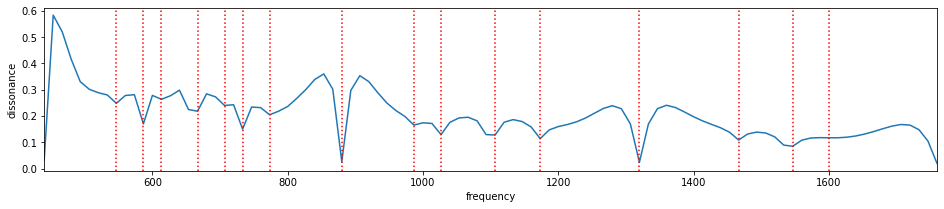

In [243]:
#dissonance
import dissonant as D
import matplotlib.pyplot as plt
from scipy.signal import argrelmin
from ipywidgets import interact
import ipywidgets as widgets
from dissonant import models
def freq_space(base_f=440, octaves=4, steps=100):
    ratios = np.linspace(1, octaves, steps)
    freqs = base_f * ratios
    return freqs

def dissonance_curve(freq_space, n_partials=10, model='sethares1993'):
    dissonances = []
    for freq in freq_space:
        h_freqs, h_amps = D.harmonic_tone([freq_space[0], freq], n_partials=n_partials)
        print(h_amps)
        d = D.dissonance(h_freqs, h_amps, model=model)
        dissonances.append(d)
    dissonances = np.array(dissonances)
    return dissonances

def plot_dissonance_curve(freqs, dissonances):
    minima = argrelmin(dissonances)[0]

    plt.figure(figsize=(16, 3))
    plt.xlim(freqs[0], freqs[-1])
    plt.plot(freqs, dissonances)
    for m in minima:
        plt.axvline(freqs[m], c='r', ls=':')
    plt.xlabel('frequency')
    plt.ylabel('dissonance')
    
    
freqs = freq_space()
plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=10, model='sethares1993'))



In [275]:
peaks = [2, 4, 9, 17, 32]
peaks = np.array([p*1 for p in peaks])
amps = np.array([0.8, 0.7, 0.6, 0.5, 0.4])

d = dissonance(peaks, amps, model='sethares1993')
d

0.4822010195196033

In [244]:
from dissonant import models
def dissonance(freqs, amps, model='sethares1993', aggregation=lambda d: d.sum()):
    """
    Computes dissonance score for chord composed of muliple frequences,
    each possible with different amplitudes using a given dissonance model.
    """
    # Get rid of practically zero terms:
    #nonzero_amps = amps >= 1e-6
    #freqs, amps = freqs[nonzero_amps], amps[nonzero_amps]

    # The frequencies are sorted in order to generate pairs where f_1 <= f_2.
    # Otherwise bad things happen.
    freqs = freqs.flatten()
    freq_idx = freqs.argsort()
    freqs = freqs[freq_idx]
    amps = amps.flatten()[freq_idx]
    n = len(freqs)
    idx_pairs = np.array([(i, j) for i in range(n) for j in range(n) if i < j])
    idx_1 = idx_pairs[:, 0]
    idx_2 = idx_pairs[:, 1]
    dissonances = dissonance_pair(
        freqs[idx_1], freqs[idx_2],
        amps[idx_1], amps[idx_2],
        model)
    return aggregation(dissonances)

def dissonance_pair(f_1, f_2, a_1, a_2, model):
    """
    Computes the dissonance metric for a pair(s) of sinusoidal tones with given
    frequency and amplitude using the specified model.
    The parameters can be either a single value or a numpy array. In the latter
    case the computation is vectorized for the whole array.
    Parameters:
    f_1 - lower frequencies
    f_2 - upper frequencies
    a_1 - amplitudes for f_1
    a_2 - amplitudes for f_2
    model - known model name (see list_models())
    Returns:
    dissonance - a single value or array
    """
    assert_nonnegative((f_1, f_2, a_1, a_2))
    if type(model) == str:
        model = models.models[model]
    return model.dissonance_pair(f_1, f_2, a_1, a_2)

def assert_nonnegative(values):
    for v in values:
        assert np.all(v >= 0)

In [230]:
h_amps

array([[0.88      , 0.7744    , 0.681472  , 0.59969536, 0.52773192,
        0.46440409, 0.4086756 , 0.35963452, 0.31647838, 0.27850098],
       [0.88      , 0.7744    , 0.681472  , 0.59969536, 0.52773192,
        0.46440409, 0.4086756 , 0.35963452, 0.31647838, 0.27850098]])

[[0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098 0.24508086 0.21567116
  0.18979062 0.16701574 0.14697385 0.12933699 0.11381655 0.10015857
  0.08813954 0.07756279 0.06825526 0.06006463 0.05285687 0.04651405
  0.04093236 0.03602048 0.03169802 0.02789426 0.02454695 0.02160131
  0.01900916 0.01672806 0.01472069 0.01295421 0.0113997  0.01003174
  0.00882793 0.00776858 0.00683635 0.00601599]
 [0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.35963452 0.31647838 0.27850098 0.24508086 0.21567116
  0.18979062 0.16701574 0.14697385 0.12933699 0.11381655 0.10015857
  0.08813954 0.07756279 0.06825526 0.06006463 0.05285687 0.04651405
  0.04093236 0.03602048 0.03169802 0.02789426 0.02454695 0.02160131
  0.01900916 0.01672806 0.01472069 0.01295421 0.0113997  0.01003174
  0.00882793 0.00776858 0.00683635 0.00601599]]
[[0.88       0.7744     0.681472   0.59969536 0.52773192 0.46440409
  0.4086756  0.359634

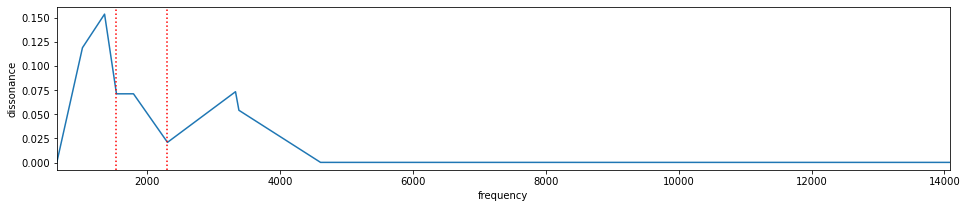

In [342]:
peaks = [2.5, 4, 5.3, 6, 7, 9, 13, 13.2, 18, 20.3, 22, 24, 25, 26.5, 33, 55]
peaks = [p*256 for p in peaks]
freqs = peaks
dis = dissonance_curve(freqs, 40)

plot_dissonance_curve(freqs, dissonance_curve(freqs, n_partials=5, model='sethares1993'))

In [315]:
h_freqs, h_amps = D.harmonic_tone([2.5, 5.0, 10, 20, 30], n_partials=10)
#print(h_freqs)
d = D.dissonance(h_freqs, h_amps, model='sethares1993')
d

28.790056899843304

In [172]:
D.dissonance(ratios, ratios)

10142.755025668323

[[440.]
 [440.]]
[[440.        ]
 [440.44044044]]
[[440.        ]
 [440.88088088]]
[[440.        ]
 [441.32132132]]
[[440.        ]
 [441.76176176]]
[[440.       ]
 [442.2022022]]
[[440.        ]
 [442.64264264]]
[[440.        ]
 [443.08308308]]
[[440.        ]
 [443.52352352]]
[[440.        ]
 [443.96396396]]
[[440.       ]
 [444.4044044]]
[[440.        ]
 [444.84484484]]
[[440.        ]
 [445.28528529]]
[[440.        ]
 [445.72572573]]
[[440.        ]
 [446.16616617]]
[[440.        ]
 [446.60660661]]
[[440.        ]
 [447.04704705]]
[[440.        ]
 [447.48748749]]
[[440.        ]
 [447.92792793]]
[[440.        ]
 [448.36836837]]
[[440.        ]
 [448.80880881]]
[[440.        ]
 [449.24924925]]
[[440.        ]
 [449.68968969]]
[[440.        ]
 [450.13013013]]
[[440.        ]
 [450.57057057]]
[[440.        ]
 [451.01101101]]
[[440.        ]
 [451.45145145]]
[[440.        ]
 [451.89189189]]
[[440.        ]
 [452.33233233]]
[[440.        ]
 [452.77277277]]
[[440.        ]
 [453.21321321

 [858.85885886]]
[[440.       ]
 [859.2992993]]
[[440.        ]
 [859.73973974]]
[[440.        ]
 [860.18018018]]
[[440.        ]
 [860.62062062]]
[[440.        ]
 [861.06106106]]
[[440.       ]
 [861.5015015]]
[[440.        ]
 [861.94194194]]
[[440.        ]
 [862.38238238]]
[[440.        ]
 [862.82282282]]
[[440.        ]
 [863.26326326]]
[[440.       ]
 [863.7037037]]
[[440.        ]
 [864.14414414]]
[[440.        ]
 [864.58458458]]
[[440.        ]
 [865.02502503]]
[[440.        ]
 [865.46546547]]
[[440.        ]
 [865.90590591]]
[[440.        ]
 [866.34634635]]
[[440.        ]
 [866.78678679]]
[[440.        ]
 [867.22722723]]
[[440.        ]
 [867.66766767]]
[[440.        ]
 [868.10810811]]
[[440.        ]
 [868.54854855]]
[[440.        ]
 [868.98898899]]
[[440.        ]
 [869.42942943]]
[[440.        ]
 [869.86986987]]
[[440.        ]
 [870.31031031]]
[[440.        ]
 [870.75075075]]
[[440.        ]
 [871.19119119]]
[[440.        ]
 [871.63163163]]
[[440.        ]
 [872.07207207]]

 [ 674.75475475 1349.50950951]]
[[ 440.          880.        ]
 [ 675.1951952  1350.39039039]]
[[ 440.          880.        ]
 [ 675.63563564 1351.27127127]]
[[ 440.          880.        ]
 [ 676.07607608 1352.15215215]]
[[ 440.          880.        ]
 [ 676.51651652 1353.03303303]]
[[ 440.          880.        ]
 [ 676.95695696 1353.91391391]]
[[ 440.          880.        ]
 [ 677.3973974  1354.79479479]]
[[ 440.          880.        ]
 [ 677.83783784 1355.67567568]]
[[ 440.          880.        ]
 [ 678.27827828 1356.55655656]]
[[ 440.          880.        ]
 [ 678.71871872 1357.43743744]]
[[ 440.          880.        ]
 [ 679.15915916 1358.31831832]]
[[ 440.         880.       ]
 [ 679.5995996 1359.1991992]]
[[ 440.          880.        ]
 [ 680.04004004 1360.08008008]]
[[ 440.          880.        ]
 [ 680.48048048 1360.96096096]]
[[ 440.          880.        ]
 [ 680.92092092 1361.84184184]]
[[ 440.          880.        ]
 [ 681.36136136 1362.72272272]]
[[ 440.         880.       

 [ 566.84684685 1133.69369369 1700.54054054]]
[[ 440.          880.         1320.        ]
 [ 567.28728729 1134.57457457 1701.86186186]]
[[ 440.          880.         1320.        ]
 [ 567.72772773 1135.45545546 1703.18318318]]
[[ 440.          880.         1320.        ]
 [ 568.16816817 1136.33633634 1704.5045045 ]]
[[ 440.          880.         1320.        ]
 [ 568.60860861 1137.21721722 1705.82582583]]
[[ 440.          880.         1320.        ]
 [ 569.04904905 1138.0980981  1707.14714715]]
[[ 440.          880.         1320.        ]
 [ 569.48948949 1138.97897898 1708.46846847]]
[[ 440.          880.         1320.        ]
 [ 569.92992993 1139.85985986 1709.78978979]]
[[ 440.          880.         1320.        ]
 [ 570.37037037 1140.74074074 1711.11111111]]
[[ 440.          880.         1320.        ]
 [ 570.81081081 1141.62162162 1712.43243243]]
[[ 440.          880.         1320.        ]
 [ 571.25125125 1142.5025025  1713.75375375]]
[[ 440.          880.         1320.        ]

 [ 444.4044044   888.80880881 1333.21321321 1777.61761762]]
[[ 440.          880.         1320.         1760.        ]
 [ 444.84484484  889.68968969 1334.53453453 1779.37937938]]
[[ 440.          880.         1320.         1760.        ]
 [ 445.28528529  890.57057057 1335.85585586 1781.14114114]]
[[ 440.          880.         1320.         1760.        ]
 [ 445.72572573  891.45145145 1337.17717718 1782.9029029 ]]
[[ 440.          880.         1320.         1760.        ]
 [ 446.16616617  892.33233233 1338.4984985  1784.66466466]]
[[ 440.          880.         1320.         1760.        ]
 [ 446.60660661  893.21321321 1339.81981982 1786.42642643]]
[[ 440.          880.         1320.         1760.        ]
 [ 447.04704705  894.09409409 1341.14114114 1788.18818819]]
[[ 440.          880.         1320.         1760.        ]
 [ 447.48748749  894.97497497 1342.46246246 1789.94994995]]
[[ 440.          880.         1320.         1760.        ]
 [ 447.92792793  895.85585586 1343.78378378 1791

 [ 688.40840841 1376.81681682 2065.22522523 2753.63363363]]
[[ 440.          880.         1320.         1760.        ]
 [ 688.84884885 1377.6976977  2066.54654655 2755.3953954 ]]
[[ 440.          880.         1320.         1760.        ]
 [ 689.28928929 1378.57857858 2067.86786787 2757.15715716]]
[[ 440.          880.         1320.         1760.        ]
 [ 689.72972973 1379.45945946 2069.18918919 2758.91891892]]
[[ 440.          880.         1320.         1760.        ]
 [ 690.17017017 1380.34034034 2070.51051051 2760.68068068]]
[[ 440.          880.         1320.         1760.        ]
 [ 690.61061061 1381.22122122 2071.83183183 2762.44244244]]
[[ 440.          880.         1320.         1760.        ]
 [ 691.05105105 1382.1021021  2073.15315315 2764.2042042 ]]
[[ 440.          880.         1320.         1760.        ]
 [ 691.49149149 1382.98298298 2074.47447447 2765.96596597]]
[[ 440.          880.         1320.         1760.        ]
 [ 691.93193193 1383.86386386 2075.7957958  2767

 [ 503.42342342 1006.84684685 1510.27027027 2013.69369369 2517.11711712]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 503.86386386 1007.72772773 1511.59159159 2015.45545546 2519.31931932]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 504.3043043  1008.60860861 1512.91291291 2017.21721722 2521.52152152]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 504.74474474 1009.48948949 1514.23423423 2018.97897898 2523.72372372]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 505.18518519 1010.37037037 1515.55555556 2020.74074074 2525.92592593]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 505.62562563 1011.25125125 1516.87687688 2022.5025025  2528.12812813]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 506.06606607 1012.13213213 1518.1981982  2024.26426426 2530.33033033]]
[[ 440.          880.         1320.         

[[ 440.          880.         1320.         1760.         2200.        ]
 [ 721.88188188 1443.76376376 2165.64564565 2887.52752753 3609.40940941]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 722.32232232 1444.64464464 2166.96696697 2889.28928929 3611.61161161]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 722.76276276 1445.52552553 2168.28828829 2891.05105105 3613.81381381]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 723.2032032  1446.40640641 2169.60960961 2892.81281281 3616.01601602]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 723.64364364 1447.28728729 2170.93093093 2894.57457457 3618.21821822]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 724.08408408 1448.16816817 2172.25225225 2896.33633634 3620.42042042]]
[[ 440.          880.         1320.         1760.         2200.        ]
 [ 724.52452452 1449.04904905 2173.57357357 2

[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 511.79179179 1023.58358358 1535.37537538 2047.16716717 2558.95895896
  3070.75075075]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 512.23223223 1024.46446446 1536.6966967  2048.92892893 2561.16116116
  3073.39339339]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 512.67267267 1025.34534535 1538.01801802 2050.69069069 2563.36336336
  3076.03603604]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 513.11311311 1026.22622623 1539.33933934 2052.45245245 2565.56556557
  3078.67867868]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 513.55355355 1027.10710711 1540.66066066 2054.21421421 2567.76776777
  3081.32132132]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 513.99399399 1027.98798799 1541.98198198 2055.97597598 2569.9

[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 740.82082082 1481.64164164 2222.46246246 2963.28328328 3704.1041041
  4444.92492492]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 741.26126126 1482.52252252 2223.78378378 2965.04504505 3706.30630631
  4447.56756757]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 741.7017017  1483.4034034  2225.10510511 2966.80680681 3708.50850851
  4450.21021021]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 742.14214214 1484.28428428 2226.42642643 2968.56856857 3710.71071071
  4452.85285285]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 742.58258258 1485.16516517 2227.74774775 2970.33033033 3712.91291291
  4455.4954955 ]]
[[ 440.          880.         1320.         1760.         2200.
  2640.        ]
 [ 743.02302302 1486.04604605 2229.06906907 2972.09209209 3715.11

[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 510.91091091 1021.82182182 1532.73273273 2043.64364364 2554.55455455
  3065.46546547 3576.37637638]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 511.35135135 1022.7027027  1534.05405405 2045.40540541 2556.75675676
  3068.10810811 3579.45945946]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 511.79179179 1023.58358358 1535.37537538 2047.16716717 2558.95895896
  3070.75075075 3582.54254254]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 512.23223223 1024.46446446 1536.6966967  2048.92892893 2561.16116116
  3073.39339339 3585.62562563]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 512.67267267 1025.34534535 1538.01801802 2050.69069069 2563.36336336
  3076.03603604 3588.70870871]]
[[ 44

[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 718.7987988  1437.5975976  2156.3963964  2875.1951952  3593.99399399
  4312.79279279 5031.59159159]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 719.23923924 1438.47847848 2157.71771772 2876.95695696 3596.1961962
  4315.43543544 5034.67467467]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 719.67967968 1439.35935936 2159.03903904 2878.71871872 3598.3983984
  4318.07807808 5037.75775776]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 720.12012012 1440.24024024 2160.36036036 2880.48048048 3600.6006006
  4320.72072072 5040.84084084]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.        ]
 [ 720.56056056 1441.12112112 2161.68168168 2882.24224224 3602.8028028
  4323.36336336 5043.92392392]]
[[ 440.  

[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 476.11611612  952.23223223 1428.34834835 1904.46446446 2380.58058058
  2856.6966967  3332.81281281 3808.92892893]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 476.55655656  953.11311311 1429.66966967 1906.22622623 2382.78278278
  2859.33933934 3335.8958959  3812.45245245]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 476.996997    953.99399399 1430.99099099 1907.98798799 2384.98498498
  2861.98198198 3338.97897898 3815.97597598]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 477.43743744  954.87487487 1432.31231231 1909.74974975 2387.18718719
  2864.62462462 3342.06206206 3819.4994995 ]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.       

  3998.31831832 4664.7047047  5331.09109109]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 666.82682683 1333.65365365 2000.48048048 2667.30730731 3334.13413413
  4000.96096096 4667.78778779 5334.61461461]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 667.26726727 1334.53453453 2001.8018018  2669.06906907 3336.33633634
  4003.6036036  4670.87087087 5338.13813814]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 667.70770771 1335.41541542 2003.12312312 2670.83083083 3338.53853854
  4006.24624625 4673.95395395 5341.66166166]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 668.14814815 1336.2962963  2004.44444444 2672.59259259 3340.74074074
  4008.88888889 4677.03703704 5345.18518519]]
[[ 440.          880.         1320.         17

[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 850.49049049 1700.98098098 2551.47147147 3401.96196196 4252.45245245
  5102.94294294 5953.43343343 6803.92392392]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 850.93093093 1701.86186186 2552.79279279 3403.72372372 4254.65465465
  5105.58558559 5956.51651652 6807.44744745]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 851.37137137 1702.74274274 2554.11411411 3405.48548549 4256.85685686
  5108.22822823 5959.5995996  6810.97097097]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.        ]
 [ 851.81181181 1703.62362362 2555.43543544 3407.24724725 4259.05905906
  5110.87087087 5962.68268268 6814.49449449]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.       

  3504.14414414 4088.16816817 4672.19219219 5256.21621622]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 584.46446446 1168.92892893 1753.39339339 2337.85785786 2922.32232232
  3506.78678679 4091.25125125 4675.71571572 5260.18018018]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 584.9049049  1169.80980981 1754.71471471 2339.61961962 2924.52452452
  3509.42942943 4094.33433433 4679.23923924 5264.14414414]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 585.34534535 1170.69069069 1756.03603604 2341.38138138 2926.72672673
  3512.07207207 4097.41741742 4682.76276276 5268.10810811]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 585.78578579 1171.57157157 1757.35735736 2343.143

  4537.41741742 5293.65365365 6049.88988989 6806.12612613]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 756.67667668 1513.35335335 2270.03003003 3026.70670671 3783.38338338
  4540.06006006 5296.73673674 6053.41341341 6810.09009009]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 757.11711712 1514.23423423 2271.35135135 3028.46846847 3785.58558559
  4542.7027027  5299.81981982 6056.93693694 6814.05405405]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 757.55755756 1515.11511512 2272.67267267 3030.23023023 3787.78778779
  4545.34534535 5302.9029029  6060.46046046 6818.01801802]]
[[ 440.          880.         1320.         1760.         2200.
  2640.         3080.         3520.         3960.        ]
 [ 757.997998   1515.995996   2273.99399399 3031.991

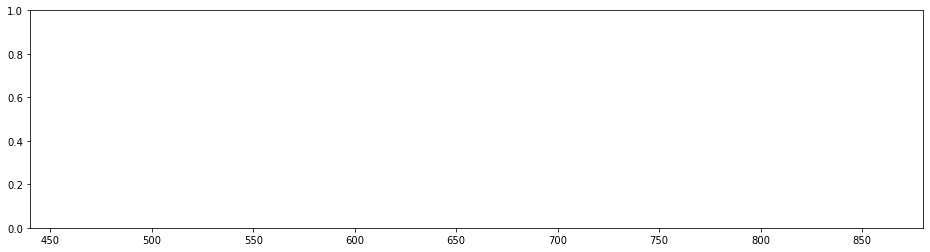

In [162]:
plt.figure(figsize=(16, 4))
for n_partials in range(1, 10):
    dissonances = []
    base_f = D.pitch_to_freq(0)
    ratios = np.linspace(1, 2, 1000)
    freqs = base_f * ratios
    for ratio in ratios:
        h_freqs, h_amps = D.harmonic_tone(base_f * np.array([1, ratio]), n_partials=n_partials)
        print(h_freqs)
        d = D.dissonance(h_freqs, h_amps, model='sethares1993')
        dissonances.append(d)

    dissonances = np.array(dissonances)

    minima = argrelmin(dissonances)[0]

    plt.xlim(freqs[0], freqs[-1])